here we find the random grafting nodes on the first outer layer of NP. Thank GOD 

In [1]:
import math
import collections
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [ ]:
from google.colab import drive#to open the google drive in colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lines=[]
#with open(r'C:\bloodProject\NP\5937beads\np2.dat') as fp:   # to read lines if atomlist after "Atoms"
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPbonds/disc/16rcDisc/disc.dat') as fp:
        for line in fp:
            if 'Atoms' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'Velocities' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    lines.append(line)# add the string in to the list
                    #lines= line.split("space")# for line in a pandas data frame. here it can not read our lines separetely. it reads all lines as a line so does not split it into different indexs

In [ ]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [ ]:
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','atomType','x','y','z','mx','my','mz']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df

,atomID,atomType,x,y,z,mx,my,mz
0,1,1,2.6196092932135144e+00,6.4818519599970026e-01,7.4845979806100420e+00,0,0,0
1,2,1,2.2453793941830122e+00,1.2963703919994005e+00,7.4845979806100420e+00,0,0,0
2,3,1,1.8711494951525105e+00,1.9445555879991010e+00,7.4845979806100420e+00,0,0,0
3,4,1,2.6196092932135144e+00,-6.4818519599970026e-01,7.4845979806100420e+00,0,0,0
4,5,1,2.2453793941830122e+00,0.0000000000000000e+00,7.4845979806100420e+00,0,0,0
...,...,...,...,...,...,...,...,...
5932,5933,1,-2.2453793941830122e+00,0.0000000000000000e+00,-7.4845979806100420e+00,0,0,0
5933,5934,1,-2.6196092932135144e+00,6.4818519599970026e-01,-7.4845979806100420e+00,0,0,0
5934,5935,1,-1.8711494951525105e+00,-1.9445555879991010e+00,-7.4845979806100420e+00,0,0,0
5935,5936,1,-2.2453793941830122e+00,-1.2963703919994005e+00,-7.4845979806100420e+00,0,0,0


In [ ]:
atom_counter=len(df)
atom_counter

5937

In [ ]:
#find distance between the beads
Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other
min_Rmsd=np.zeros (atom_counter)
min_all=np.zeros (atom_counter)

df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

#smallest = float("inf") # infinity


for i in range(0, atom_counter-1):
  smallest = float("inf") # infinity. to renew after each i to just find min of each i not min of the whole.
  for j in range(i+1, atom_counter):
  
    dx=df.loc[j,'x']-df.loc[i,'x']
    dy=df.loc[j,'y']-df.loc[i,'y']
    dz=df.loc[j,'z']-df.loc[i,'z']

    Xmsd[i,j]+=np.power(dx,2)
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
        
    #distance of all beads from each other without repeating 2-1 after calc distance of 1-2. it is distance of 3 and 4 and is not distance 3 ordistance of 4. Rmsd[3,4] and not Rmsd[3] or Rmsd[4]
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    
    #find the min of Rmsd array
    num= float(Rmsd[i,j])    
    smallest = min(smallest,num)
    min_Rmsd[i]=smallest
    #print (j,"  ",i,"  ",Rmsd[i,j],"   ",min_Rmsd[i])
    #print(i,"  ",Rmsd[i,j])

   

In [ ]:

#print (Rmsd[0,:])
print(min_Rmsd[:])

[0.7484598 0.7484598 0.7484598 ... 0.7484598 0.7484598 0.       ]


In [ ]:
#to find min of all min_Rmsd
smallest = float("inf") # infinity
for i in range(0, atom_counter-1): # we have five bond (distance) between 6 beads
    num= float(min_Rmsd[i])    
    smallest = min(smallest,num)
    min_all[i]=smallest
    #smallest_bead_distance= round(min_all[i],4)# round the float to 4 decimal
    smallest_bead_distance= min_all[i]
print (i,"    ",smallest_bead_distance)

5935      0.7484597956079861


In [ ]:
print(round(smallest_bead_distance,4))

0.7485


**find the bond list and print it in a file. Thank GOD!**

combine this code with double for loop above to save time

In [ ]:
#here we combine two tasks above to make the code faster and so we do:
#1) find beads that have the min of distances and then count number of bonds with that size( distance) each bead has 
#2)show the beads with the least distance with each bead in front of that bead and print in a file
counter_bond=0 # to count total number of  bonds
#bonded_beads_i=np.zeros((atom_counter,atom_counter))
#bonded_beads_j=np.zeros((atom_counter,atom_counter))


count_bonded=np.zeros(atom_counter)
i=0
j=0



 #for i in range(0, 9):
for i in range(0, atom_counter-1):
   counter=0  
   for j in range(i+1, atom_counter):
    #print(round(Rmsd[i,j],4))
    if round(Rmsd[i,j],4) == round(smallest_bead_distance,4):
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       counter_bond+=1

       count_bonded[i]+=1 # count number of bonds
print(counter_bond)

22076


In [ ]:
#to find max # of bonds a bead can have
largest = float("-inf") # infinity
max_bond= np.zeros(atom_counter)
i=0


for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded[i])    
    largest = max(largest,num)
    max_bond[i]=largest
    
print (i,"    ",max_bond[i])
maximum_bond=max_bond[i].astype(int)

5936      4.0


here we read the bonds and for bond j which is a 3d array we convert it to 1D all in this code

In [ ]:
#here we combine 3 tasks above to make the code faster and so we do:
#1) find beads that have the min of distances and then count number of bonds with that size( distance) each bead has 
#2)show the beads with the least distance with each bead in front of that bead and print in a file
#3)thank GOD thank GOD read array of bounded_beads_j and put in a 1D array

counter_total_bond=0 # to count total number of  bonds
counter_j=0
bonded_beads_arr_j=np.zeros(counter_bond)
bonded_beads_i=np.zeros((atom_counter,maximum_bond+1))
bonded_beads_j=np.zeros((atom_counter,atom_counter,maximum_bond+1)) # 3d array

i=0
j=0

df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int




for i in range(0, atom_counter-1):
   counter=0  
   for j in range(i+1, atom_counter):

    if round(Rmsd[i,j],4) == round(smallest_bead_distance,4):
       counter+=1   # thank GOD instead of making another for loop to go through the 4 bonded beads we used this counter annd it will only save bonded beads in the array
       counter_total_bond+=1
       #print(i,'',j,'',Rmsd[i,j])

       bonded_beads_i[i][counter]=df.loc[i,'atomID'] # to save the beads that have least distance with a bead in an array for that bead as i
       bonded_beads_j[i][j][counter]=df.loc[j,'atomID'] # to save the beads that have least distance with a bead in an array for that bead as j
          
       if bonded_beads_j[i][j][counter] != 0: # Thank GOD! for j bond we need to put the 3D array to 1D in here otherwise I have to make a 3 for loop to read this 3D array and then put in a 1D array which is very time consuming
             bonded_beads_arr_j[counter_j] =bonded_beads_j[i][j][counter]  #convert 3D to 1D array Thank GOD!
             #print(i,'  ',j,'   ',counter_j,'  ',bonded_beads_arr_j[counter_j])
             counter_j+=1
       
       
       # to print in a file
       #original_stdout = sys.stdout # Save a reference to the original standard output
       #sys.stdout = f # Change the standard output to the file we created.
       #print( i,"   ",counter,"   ",j,"   ",int(bonded_beads_j[i][j][counter]))
       #print( i,"   ",j,"   ", int(bonded_beads_i[i][counter]),"    ",int(bonded_beads_j[j][counter]))
       #sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
int(bonded_beads_j[1][2][1])

3

In [ ]:
#thank GOD thank GOD read array of bounded_beads_j and put in a 1D array

#bonded_beads_arr_j=np.zeros(counter_bond)

#counter_j=0


#for i in range(0, atom_counter-1):
  # for j in range(i+1, atom_counter):
     # for counter in range (1, maximum_bond+1):


        #if bonded_beads_j[i][j][counter] != 0: 
          #bonded_beads_arr_j[counter_j] =bonded_beads_j[i][j][counter]  #convert 2D to 1D array Thank GOD!
          #print(i,'  ',j,'   ',counter_j,'  ',bonded_beads_arr_j[counter_j])
          #counter_j+=1
   
          #print( i,'  ',j,"   ",counter,"   ",int(bonded_beads_j[i][j][counter]))

here for i bonds we read the array and in next code we convert the 2D array of bonds i to a 1D array

combine this code with the code below it to save time

In [ ]:
#thank GOD read the array bonded_beads_i
i=0
counter=0


#for i in range(1, counter_bond):# use counter bond because we want go through all the bonds which is equal to (num_atoms * maximum bond an atom can have)
for i in range(0, atom_counter):
   for counter in range(1, maximum_bond+1): #since max # of bonds is 4 so our matrix has dimension of 4 in this direction
     if bonded_beads_i[i][counter] != 0: 
       print( i,"   ",int(bonded_beads_i[i][counter]))

Streaming output truncated to the last 5000 lines.
4512     4513
4513     4514
4513     4514
4513     4514
4513     4514
4514     4515
4514     4515
4514     4515
4514     4515
4515     4516
4515     4516
4515     4516
4515     4516
4516     4517
4516     4517
4516     4517
4516     4517
4517     4518
4517     4518
4517     4518
4517     4518
4518     4519
4518     4519
4518     4519
4518     4519
4519     4520
4519     4520
4519     4520
4519     4520
4520     4521
4520     4521
4520     4521
4520     4521
4521     4522
4521     4522
4521     4522
4521     4522
4522     4523
4522     4523
4522     4523
4522     4523
4523     4524
4523     4524
4523     4524
4523     4524
4524     4525
4524     4525
4524     4525
4524     4525
4525     4526
4525     4526
4525     4526
4525     4526
4526     4527
4526     4527
4526     4527
4527     4528
4527     4528
4528     4529
4528     4529
4528     4529
4528     4529
4529     4530
4529     4530
4529     4530
4529     4530
4530     4531
4530     45

In [ ]:
bonded_beads_i.shape

(5937, 5)

In [ ]:
#put bonds of i in a 1D array


#bonded_beads_arr_i=np.zeros(29)
#bonded_beads_arr_j=np.zeros(29)
bonded_beads_arr_i=np.zeros(counter_bond)



counter_i=0

i=0
j=0





#for i in range(0, 29):
#for i in range(1, counter_bond):
for i in range(0, atom_counter):
   for j in range(1, maximum_bond+1):

      if bonded_beads_i[i,j] != 0: 
        bonded_beads_arr_i[counter_i] = bonded_beads_i[i,j]  #convert 2D to 1D array Thank GOD!
        print(i,'  ',j,'   ',counter_i,'  ',bonded_beads_arr_i[counter_i])
        counter_i+=1
      
    
#print(df.loc[i,'atomID'],'   ',bonded_beads_arr) # for atomID= 4

Streaming output truncated to the last 5000 lines.
4512    4     17076    4513.0
4513    1     17077    4514.0
4513    2     17078    4514.0
4513    3     17079    4514.0
4513    4     17080    4514.0
4514    1     17081    4515.0
4514    2     17082    4515.0
4514    3     17083    4515.0
4514    4     17084    4515.0
4515    1     17085    4516.0
4515    2     17086    4516.0
4515    3     17087    4516.0
4515    4     17088    4516.0
4516    1     17089    4517.0
4516    2     17090    4517.0
4516    3     17091    4517.0
4516    4     17092    4517.0
4517    1     17093    4518.0
4517    2     17094    4518.0
4517    3     17095    4518.0
4517    4     17096    4518.0
4518    1     17097    4519.0
4518    2     17098    4519.0
4518    3     17099    4519.0
4518    4     17100    4519.0
4519    1     17101    4520.0
4519    2     17102    4520.0
4519    3     17103    4520.0
4519    4     17104    4520.0
4520    1     17105    4521.0
4520    2     17106    4521.0
4520    3     17107

In [ ]:
#read number of bonds in these two arrays
bonded_beads_arr_j.astype(int)
#bonded_beads_arr_j.shape

array([   2,    5,    6, ..., 5937, 5936, 5937])

In [ ]:
bonded_beads_arr_i.astype(int)
#bonded_beads_arr_i.shape

array([   1,    1,    1, ..., 5933, 5935, 5936])

**count total number of bond that each bead has**

In [ ]:
#for j column
i=0
j=0
count_bonded_j=np.zeros(atom_counter)
#count_bonded_j=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond): 
#for i in range(0, 29):  #over all the beads

  for j in bonded_beads_arr_j.astype(int): # over the beads in array

    #if bonded_beads_arr_i[i].astype(int)==j :  # check how many of a certain bead are in the array
    #if i==j :  # check how many of a certain bead are in the array
    if (i+1)==j : # since the bond of j has several zero bonds so we start i from 1 to not read those zeros.
      count_bonded_j[i]+=1
      print(i,'  ',j,'  ',count_bonded_j[i])
      #print(i,'', j)

Streaming output truncated to the last 5000 lines.
4609    4610    4.0
4610    4611    1.0
4610    4611    2.0
4610    4611    3.0
4610    4611    4.0
4611    4612    1.0
4611    4612    2.0
4611    4612    3.0
4611    4612    4.0
4612    4613    1.0
4612    4613    2.0
4612    4613    3.0
4612    4613    4.0
4613    4614    1.0
4613    4614    2.0
4613    4614    3.0
4613    4614    4.0
4614    4615    1.0
4614    4615    2.0
4614    4615    3.0
4614    4615    4.0
4615    4616    1.0
4615    4616    2.0
4615    4616    3.0
4615    4616    4.0
4616    4617    1.0
4616    4617    2.0
4616    4617    3.0
4616    4617    4.0
4617    4618    1.0
4617    4618    2.0
4617    4618    3.0
4617    4618    4.0
4618    4619    1.0
4618    4619    2.0
4618    4619    3.0
4618    4619    4.0
4619    4620    1.0
4619    4620    2.0
4619    4620    3.0
4619    4620    4.0
4620    4621    1.0
4620    4621    2.0
4620    4621    3.0
4620    4621    4.0
4621    4622    1.0
4621    4622    2.0
4621    4

In [ ]:
#for i column
i=0
j=0
count_bonded_i=np.zeros(atom_counter)
#count_bonded_i=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond):
#for i in range(0, 29):  #over all the beads
#for i in bonded_beads_arr_i:  #over all the beads
  for j in bonded_beads_arr_i.astype(int): # over the beads in array

    #if bonded_beads_arr_i[i].astype(int)==j :  # check how many of a certain bead are in the array
    #if i==j :  # check how many of a certain bead are in the array
    if (i+1)==j:
      count_bonded_i[i]+=1
      print(i,'  ',count_bonded_i[i])
      #print(i,'', j)

Streaming output truncated to the last 5000 lines.
4512    4.0
4513    1.0
4513    2.0
4513    3.0
4513    4.0
4514    1.0
4514    2.0
4514    3.0
4514    4.0
4515    1.0
4515    2.0
4515    3.0
4515    4.0
4516    1.0
4516    2.0
4516    3.0
4516    4.0
4517    1.0
4517    2.0
4517    3.0
4517    4.0
4518    1.0
4518    2.0
4518    3.0
4518    4.0
4519    1.0
4519    2.0
4519    3.0
4519    4.0
4520    1.0
4520    2.0
4520    3.0
4520    4.0
4521    1.0
4521    2.0
4521    3.0
4521    4.0
4522    1.0
4522    2.0
4522    3.0
4522    4.0
4523    1.0
4523    2.0
4523    3.0
4523    4.0
4524    1.0
4524    2.0
4524    3.0
4524    4.0
4525    1.0
4525    2.0
4525    3.0
4525    4.0
4526    1.0
4526    2.0
4526    3.0
4527    1.0
4527    2.0
4528    1.0
4528    2.0
4528    3.0
4528    4.0
4529    1.0
4529    2.0
4529    3.0
4529    4.0
4530    1.0
4530    2.0
4530    3.0
4530    4.0
4531    1.0
4531    2.0
4531    3.0
4531    4.0
4532    1.0
4532    2.0
4532    3.0
4532    4.0
4533    1.0
4

In [ ]:
#  thank GOD count total bonds for each bead
#count_bonded_total=np.zeros(268)
count_bonded_total=np.zeros(atom_counter)
#count_bonded_total=np.zeros(counter_bond)

for i in range(0, atom_counter):
#for i in range(1, counter_bond):
#for i in range(0, 29):  #over all the beads
   count_bonded_total[i]=count_bonded_i[i]+count_bonded_j[i]
   print(i,' ', count_bonded_total[i])

Streaming output truncated to the last 5000 lines.
937   8.0
938   8.0
939   8.0
940   8.0
941   8.0
942   8.0
943   8.0
944   8.0
945   6.0
946   6.0
947   8.0
948   8.0
949   8.0
950   8.0
951   8.0
952   8.0
953   8.0
954   8.0
955   8.0
956   8.0
957   8.0
958   8.0
959   8.0
960   8.0
961   6.0
962   6.0
963   8.0
964   8.0
965   8.0
966   8.0
967   8.0
968   8.0
969   8.0
970   8.0
971   8.0
972   8.0
973   8.0
974   8.0
975   8.0
976   8.0
977   8.0
978   6.0
979   5.0
980   8.0
981   8.0
982   8.0
983   8.0
984   8.0
985   8.0
986   8.0
987   8.0
988   8.0
989   8.0
990   8.0
991   8.0
992   8.0
993   8.0
994   8.0
995   8.0
996   5.0
997   4.0
998   8.0
999   8.0
1000   8.0
1001   8.0
1002   8.0
1003   8.0
1004   8.0
1005   8.0
1006   8.0
1007   8.0
1008   8.0
1009   8.0
1010   8.0
1011   8.0
1012   8.0
1013   8.0
1014   8.0
1015   4.0
1016   7.0
1017   8.0
1018   8.0
1019   8.0
1020   8.0
1021   8.0
1022   8.0
1023   8.0
1024   8.0
1025   8.0
1026   8.0
1027   8.0
1028   8.0


In [ ]:
#to find min # of bonds a bead has in our NP
smallest = float("inf") # infinity
min_bond= np.zeros(atom_counter)
i=0

for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded_total[i])    
    smallest = min(smallest,num)
    min_bond[i]=smallest
    
print (i,"    ",min_bond[i])

5936      4.0


In [ ]:
#to find max # of bonds a bead can have
largest = float("-inf") # infinity
max_bond= np.zeros(atom_counter)
i=0

for i in range(1, atom_counter): # we have five bond (distance) between 6 beads
    num= float(count_bonded_total[i])    
    largest = max(largest,num)
    max_bond[i]=largest
    
print (i,"    ",max_bond[i])

5936      8.0


in our nanoparticle which is made with simple hexagonal lattice the center beads can have 8 bonds in general.

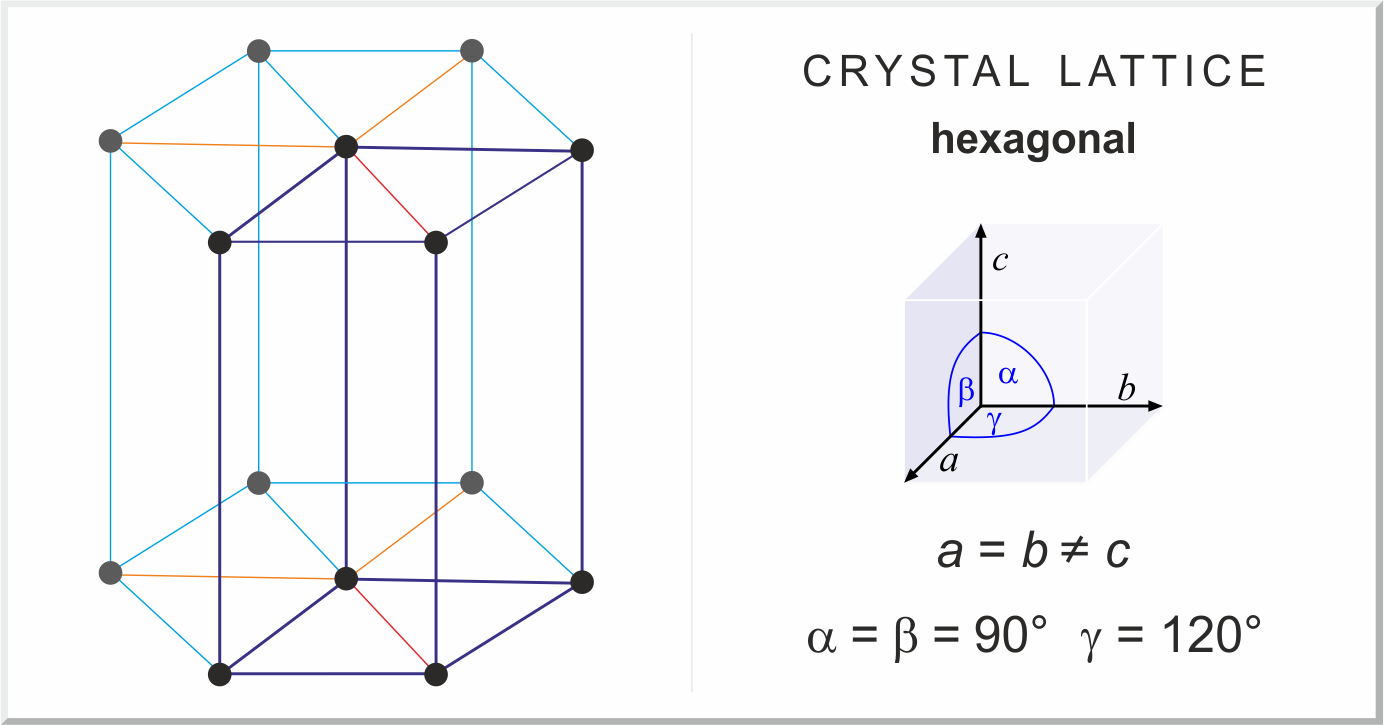

**first layer of the two outer layers**



In [ ]:
# to find beads with 3 bonds( the first outer layer of beads) and change their atom type in atom list.

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
  #if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads
    countType+=1
    #df.loc[index,"atomType"] = df.loc[index,"atomType"]+1
    df.loc[index,"atomType"] = '4'
    
#print (countType)
    #df.loc[df['atomID'] >atmCounter , 'atomID'] = df.loc[index,"atomID"]-atmCounter    #to modify the column of atomID after deleting the atoms of toluene in atom list. it is a if condition in python
print(df)

      atomID atomType         x         y         z mx my mz
0          1        4  2.619609  0.648185  7.484598  0  0  0
1          2        4  2.245379  1.296370  7.484598  0  0  0
2          3        4  1.871149  1.944556  7.484598  0  0  0
3          4        4  2.619609 -0.648185  7.484598  0  0  0
4          5        4  2.245379  0.000000  7.484598  0  0  0
...      ...      ...       ...       ...       ... .. .. ..
5932    5933        4 -2.245379  0.000000 -7.484598  0  0  0
5933    5934        4 -2.619609  0.648185 -7.484598  0  0  0
5934    5935        4 -1.871149 -1.944556 -7.484598  0  0  0
5935    5936        4 -2.245379 -1.296370 -7.484598  0  0  0
5936    5937        4 -2.619609 -0.648185 -7.484598  0  0  0

[5937 rows x 8 columns]


In [ ]:
for index in df.index:
  print(df.loc[index,"atomType"])

In [ ]:
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/hexagonal_np/one_atom_type/simple_lattice_structure/very_simple_lattice/testbeads/95/2type3,4,5,6,7.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
#to write data frame with different atomType for first outer layer to a file
df.to_csv('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/hexagonal_np/one_atom_type/simple_lattice_structure/very_simple_lattice/5937beads/atomsBond4,5,6,7.dat', mode='w',  sep=" ", header=False)

In [ ]:
# we save the index of first layer beads and other beads in arrays 


other_atomNumber=atom_counter-countType

atomID_firstLayer_arr=np.zeros (countType)# df.shape[0] count number of rows in the data frame pandas
atomID_other_arr=np.zeros (other_atomNumber)# df.shape[0] count number of rows in the data frame pandas
count_firstLayer=0
count_other=0

for index in df.index:
  #if count_bonded[index] < 4:
   #if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
   if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads  
     #atomID_firstLayer_arr[count_firstLayer]= df.loc[index,'atomID']
     atomID_firstLayer_arr[count_firstLayer]= index # we save the index instead of atomID because in next parts of code we want to find distance of beads in this array so we need their index
     count_firstLayer+=1
   else:
     #atomID_other_arr[count_other]=df.loc[index,'atomID']  
     atomID_other_arr[count_other]=index 
     count_other+=1
    

print(atomID_firstLayer_arr.astype(int))
 

[   0    1    2 ... 5934 5935 5936]


In [ ]:
for i in range(1,count_firstLayer):
  print(i,'',atomID_firstLayer_arr[i]) 

1  1.0
2  2.0
3  3.0
4  4.0
5  5.0
6  6.0
7  7.0
8  8.0
9  9.0
10  10.0
11  11.0
12  12.0
13  13.0
14  14.0
15  15.0
16  16.0
17  17.0
18  18.0
19  19.0
20  20.0
21  21.0
22  22.0
23  23.0
24  24.0
25  25.0
26  26.0
27  27.0
28  28.0
29  29.0
30  30.0
31  31.0
32  32.0
33  33.0
34  34.0
35  35.0
36  36.0
37  37.0
38  38.0
39  39.0
40  40.0
41  41.0
42  42.0
43  43.0
44  44.0
45  45.0
46  46.0
47  47.0
48  48.0
49  49.0
50  50.0
51  51.0
52  52.0
53  53.0
54  54.0
55  55.0
56  56.0
57  57.0
58  58.0
59  59.0
60  60.0
61  61.0
62  62.0
63  63.0
64  64.0
65  65.0
66  66.0
67  67.0
68  68.0
69  69.0
70  70.0
71  74.0
72  75.0
73  76.0
74  77.0
75  78.0
76  85.0
77  86.0
78  87.0
79  88.0
80  96.0
81  97.0
82  98.0
83  99.0
84  108.0
85  109.0
86  110.0
87  111.0
88  119.0
89  120.0
90  121.0
91  122.0
92  131.0
93  132.0
94  133.0
95  134.0
96  142.0
97  143.0
98  144.0
99  145.0
100  152.0
101  153.0
102  154.0
103  155.0
104  156.0
105  160.0
106  161.0
107  162.0
108  163.0
109  164.0
1

In [ ]:
atomID_firstLayer_arr.shape

(1346,)

find grafting nodes

#  Random distribution:

# write all these layers of beads with two beads distance with bead 0 (loops) in one code (loop)
# with considering 6 as the center bead

In [ ]:
#find the number  of beads in  the  first outer layer
firstLayer_counter=0  
i=0

for i in atomID_firstLayer_arr.astype(int):
    

      #first_rowColumn[counter]=i # array of index of beads that are in the upper layer of the wall

      firstLayer_counter+=1
      #print(i,'  ',df.loc[i,"atomType"],'',df.loc[i,"atomID"])
      print(firstLayer_counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
atomID_firstLayer_arr

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 5.934e+03, 5.935e+03,
       5.936e+03])

In [ ]:
#Thank GOD!
# find the first layer of beads with desired distane with the center bead (bead 6)
Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other
desiredDistance_list=[6] # fill the list with 6 as the center bead
desiredDistance_array= np.array(desiredDistance_list)
#c_array=np.zeros(10)

j=0
i=0

#print(c_array)
counter2=0
counter_bond2=0 # to count total number of  bonds


df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

for i in desiredDistance_array.astype(int): # counter is equal to length
#for i in range (0,1): # counter is equal to length
 desiredDistance_list=[]
 for j in range(0, firstLayer_counter):
    
    dx=df.loc[atomID_firstLayer_arr[j],'x']-df.loc[atomID_firstLayer_arr[i],'x']  # thank GOD we found the dx between the beads in the top layer
    dy=df.loc[atomID_firstLayer_arr[j],'y']-df.loc[atomID_firstLayer_arr[i],'y']
    dz=df.loc[atomID_firstLayer_arr[j],'z']-df.loc[atomID_firstLayer_arr[i],'z']  
    
    Xmsd[i,j]+=np.power(dx,2)
    Ymsd[i,j]+=np.power(dy,2)
    Zmsd[i,j]+=np.power(dz,2)
     
    Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    #print (i,'  ',j,'   ',Rmsd[i,j])
    #c_list=[]
    #if round(Rmsd[i,j],4) == 2*smallest_bead_distance:
    #if round(Rmsd[i,j],4) == 1.4969: #for 2 beads distance
    if round(Rmsd[i,j],4) == round((8*smallest_bead_distance),4): #Thank GOD! no we can check beads with all possible distances
        
      if atomID_firstLayer_arr[j] not in desiredDistance_array:          
        desiredDistance_list.append(atomID_firstLayer_arr[j])
        desiredDistance_array= np.array(desiredDistance_list)
        #print(atomID_firstLayer_arr[j])
print(desiredDistance_array.astype(int))

[172 175 626 889 892 915]


In [ ]:
#Thank GOD! sara
#Works for random grafting
# find all the beads with desired distane with the center bead (bead 6)
Xmsd=np.zeros ((atom_counter,atom_counter))# make 2D arrays
Ymsd=np.zeros ((atom_counter,atom_counter))
Zmsd=np.zeros ((atom_counter,atom_counter))
#Rmsd=np.zeros ((atom_counter,atom_counter))
Rmsd=np.zeros ((atom_counter+1,atom_counter+1)) # bc of last rmsd for second layer of outer layer
# #double array bc we want compare distances for each i and j  with each other
desiredDistance_list=[6]
desiredDistance_array= np.array(desiredDistance_list)


j=0
i=0

#print(c_list)
counter2=0
counter_bond2=0 # to count total number of  bonds


df.loc[:,'x'] = df.loc[:,'x'].astype(float) #convert string to foat for x , y , z 
df.loc[:,'y'] = df.loc[:,'y'].astype(float)
df.loc[:,'z'] = df.loc[:,'z'].astype(float)

k=0 #step counter
l=0 # Bead counter in each step
StepCount= 10
BeadCount= firstLayer_counter
storage=np.zeros ((StepCount,BeadCount))
#print(i,'   ',j,'  ',desiredDistance_array.astype(int))

while len(desiredDistance_list)!=0:
 
    desiredDistance_array= np.array(desiredDistance_list)
    desiredDistance_list=[]
 
    for i in desiredDistance_array.astype(int): # counter is equal to length

        for j in range(i+1, firstLayer_counter):
        #for j in range(0, firstLayer_counter):
        # since I used bead 6 as center bead and find distances with this bead 
        #I should start from zero to also check the beads before bead 6 with it. but here since we  check beads with distance
        #2*distance and also since it is a random distribution we do not need to start from zero so our code works well
            
            dx=df.loc[atomID_firstLayer_arr[j],'x']-df.loc[atomID_firstLayer_arr[i],'x']  # thank GOD we found the dx between the beads in the top layer
            dy=df.loc[atomID_firstLayer_arr[j],'y']-df.loc[atomID_firstLayer_arr[i],'y']
            dz=df.loc[atomID_firstLayer_arr[j],'z']-df.loc[atomID_firstLayer_arr[i],'z']  
    
            Xmsd[i,j]+=np.power(dx,2)
            Ymsd[i,j]+=np.power(dy,2)
            Zmsd[i,j]+=np.power(dz,2)
     
            Rmsd[i,j]=math.sqrt(Xmsd[i,j]+Ymsd[i,j]+ Zmsd[i,j]);
    
    
            #if round(Rmsd[i,j],4) == 2*smallest_bead_distance:
            #if round(Rmsd[i,j],4) == 1.4969:
            if round(Rmsd[i,j],4) == round((5*smallest_bead_distance),4): #Thank GOD! now we can check beads with all possible distances
                
                if atomID_firstLayer_arr[j] not in desiredDistance_array:          
                    desiredDistance_list.append(atomID_firstLayer_arr[j])
                    storage[k][l] = atomID_firstLayer_arr[j] # stores the beads with 2 beads distance at an array
                    l+=1
                    #print("c_list:   ")    
                    #print(c_list)
        
    k+=1   
    l=0 # Bead counter in each step
    desiredDistance_array= np.array(desiredDistance_list)
  #print("c_array:   ")    
  #print (c_array)  
    #print (k) 
 #print("c_list:   ")    
 #print(c_list)    

#print("storage:  ")
print(storage)


[[  40.   45.  176. ...    0.    0.    0.]
 [ 277.  304.  352. ...    0.    0.    0.]
 [1350. 1532. 1739. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


In [ ]:
storage=storage[storage!=0]
print(storage)

[  40.   45.  176.  180.  186.  219.  277.  304.  352.  355.  247.  357.
  522.  579.  357.  866.  875.  864.  876. 1181. 1557. 1560.  997. 1170.
 1351. 1350. 1532. 1739. 2267. 1952. 1960. 2729. 2757. 1199. 1907. 1938.
 2731. 1207. 1240. 1592. 1941. 2316. 2324. 2800. 4115. 3274. 4060. 4739.
 5055. 5099. 5414. 5052. 5098. 5428. 5889. 5912. 5334. 5574. 5766. 5646.
 5893. 5899. 5923. 5934. 5906. 5915. 5935. 5781. 5828.]


# I used this random nodes for connecting 57 chains of ligand to my 16rc np

In [ ]:
storage.shape

(69,)

## -----**Second way of finding random nodes on the first layer of NP**----
**for 302 nodes**

find 302 random nodes among 1346 atomIDs in the atomID_firstLayer_arr

In [ ]:
#Random Subsample From a List
	
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(1)
atomID_firstLayer_list= atomID_firstLayer_arr.tolist()
nodes = sample(atomID_firstLayer_list, 302)# since the sample code does just work with a list and not an array so we converted our array to a list
print(nodes)

[788.0, 5580.0, 184.0, 2067.0, 604.0, 4884.0, 4377.0, 4695.0, 5925.0, 3596.0, 1563.0, 368.0, 4766.0, 58.0, 3636.0, 4196.0, 5783.0, 4.0, 4369.0, 2285.0, 1840.0, 5741.0, 444.0, 2784.0, 62.0, 45.0, 52.0, 5921.0, 5336.0, 18.0, 3599.0, 1594.0, 4015.0, 59.0, 5235.0, 1698.0, 4294.0, 4902.0, 5461.0, 1907.0, 3177.0, 1875.0, 1641.0, 4451.0, 2473.0, 44.0, 3996.0, 5509.0, 5906.0, 412.0, 1257.0, 5879.0, 2620.0, 612.0, 3062.0, 4990.0, 5044.0, 1331.0, 2729.0, 2378.0, 5717.0, 4958.0, 5033.0, 3687.0, 5729.0, 70.0, 4735.0, 1944.0, 3908.0, 3992.0, 1193.0, 3462.0, 5383.0, 3573.0, 353.0, 4311.0, 5046.0, 539.0, 1089.0, 5115.0, 3523.0, 4781.0, 60.0, 4644.0, 120.0, 2752.0, 5826.0, 5750.0, 5631.0, 3688.0, 5916.0, 1181.0, 1169.0, 5006.0, 1801.0, 25.0, 1518.0, 5333.0, 5382.0, 1892.0, 3909.0, 5059.0, 3174.0, 5620.0, 3206.0, 4450.0, 2314.0, 5792.0, 11.0, 3604.0, 5054.0, 686.0, 5097.0, 5561.0, 1554.0, 4060.0, 169.0, 4737.0, 3400.0, 5582.0, 5478.0, 1519.0, 5032.0, 3988.0, 4745.0, 3238.0, 3178.0, 3.0, 5330.0, 5334.0,

In [ ]:
len(nodes)

302

In [ ]:
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPfinal/5937beads/302nodes.txt' , 'w') as f: 
    
   
 original_stdout = sys.stdout # Save a reference to the original standard output
 sys.stdout = f # Change the standard output to the file we created.
 print(nodes)
 sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
# to  change nodes atom type in atom list.

countType=0
df.loc[:,"atomID"] = df.loc[:,"atomID"].astype(int) #convert string to int
df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int

for index in df.index:
  if index in nodes:  
    countType+=1
    
    df.loc[index,"atomType"] = '7' #atom type of 302 nodes
    
#print(df)
print(countType)

302


In [ ]:
for index in df.index:
  print(df.loc[index,"atomType"])

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
7
1
1
1
1
1
1
1
1
1
1
1
1
1
4
7
1
1
1
1
1
1
1
1
1
1
1
1
7
4
7
1
1
1
1
1
1
1
1
1
7
4
4
7
1
1
1
1
1
1
4
4
7
4
4
4
4
4
4
4
7
4
4
4
4
4
4
1
1
1
1
1
4
7
4
4
1
1
1
1
1
1
1
1
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
4
7
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
7
1

In [ ]:
#print only the atom type
with open('/content/drive/My Drive/Case/nanoBloodProject/brushBox/NP/NPfinal/5937beads/atomTypeNodes.dat', 'w') as f: 
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

# end of finding random nodes for grafting density of ligands#######

In [ ]:
print(df)

      atomID atomType         x         y         z mx my mz
0          1        4  2.619609  0.648185  7.484598  0  0  0
1          2        4  2.245379  1.296370  7.484598  0  0  0
2          3        4  1.871149  1.944556  7.484598  0  0  0
3          4        4  2.619609 -0.648185  7.484598  0  0  0
4          5        4  2.245379  0.000000  7.484598  0  0  0
5          6        4  1.871149  0.648185  7.484598  0  0  0
6          7        4  1.496920  1.296370  7.484598  0  0  0
7          8        4  1.122690  1.944556  7.484598  0  0  0
8          9        4  0.748460  2.592741  7.484598  0  0  0
9         10        4  2.245379 -1.296370  7.484598  0  0  0
10        11        4  1.871149 -0.648185  7.484598  0  0  0
11        12        4  1.496920  0.000000  7.484598  0  0  0
12        13        4  1.122690  0.648185  7.484598  0  0  0
13        14        4  0.748460  1.296370  7.484598  0  0  0
14        15        4  0.374230  1.944556  7.484598  0  0  0
15        16        4  0

In [ ]:
# to find beads that have bonds with the first outer layer of beads (find the second outer layer) and change their atom type in atom list.

df.loc[:,"atomType"] = df.loc[:,"atomType"].astype(int) #convert string to int
counter=0

for index in storage.astype(int):  
 #if index != 0:
    counter+=1
    
    df.loc[index,"atomType"] = '2'
    #print( df.loc[index,"atomType"])
print(df)
#print(counter)

      atomID atomType         x         y         z mx my mz
0          1        4  2.619609  0.648185  7.484598  0  0  0
1          2        4  2.245379  1.296370  7.484598  0  0  0
2          3        4  1.871149  1.944556  7.484598  0  0  0
3          4        4  2.619609 -0.648185  7.484598  0  0  0
4          5        4  2.245379  0.000000  7.484598  0  0  0
5          6        4  1.871149  0.648185  7.484598  0  0  0
6          7        4  1.496920  1.296370  7.484598  0  0  0
7          8        4  1.122690  1.944556  7.484598  0  0  0
8          9        4  0.748460  2.592741  7.484598  0  0  0
9         10        4  2.245379 -1.296370  7.484598  0  0  0
10        11        4  1.871149 -0.648185  7.484598  0  0  0
11        12        4  1.496920  0.000000  7.484598  0  0  0
12        13        4  1.122690  0.648185  7.484598  0  0  0
13        14        4  0.748460  1.296370  7.484598  0  0  0
14        15        4  0.374230  1.944556  7.484598  0  0  0
15        16        4  0

In [ ]:
with open(r'C:\bloodProject\NP\5937beads\graftingType2.dat', 'w') as f: 
    
 for index in df.index:
  
   original_stdout = sys.stdout # Save a reference to the original standard output
   sys.stdout = f # Change the standard output to the file we created.
   print(df.loc[index,"atomType"])
   sys.stdout = original_stdout # Reset the standard output to its original value

In [ ]:
# we save the index of second layer beads and other beads in arrays 


other_atomNumber=atom_counter-countType

atomID_firstLayer_arr=np.zeros (countType)# df.shape[0] count number of rows in the data frame pandas
atomID_other_arr=np.zeros (other_atomNumber)# df.shape[0] count number of rows in the data frame pandas
count_firstLayer=0
count_other=0

for index in df.index:
  #if count_bonded[index] < 4:
   #if count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7:
   if count_bonded_total[index] == 3 or count_bonded_total[index] == 4 or count_bonded_total[index] == 5 or count_bonded_total[index] == 6 or count_bonded_total[index] == 7: #test 95 beads  
     #atomID_firstLayer_arr[count_firstLayer]= df.loc[index,'atomID']
     atomID_firstLayer_arr[count_firstLayer]= index # we save the index instead of atomID because in next parts of code we want to find distance of beads in this array so we need their index
     count_firstLayer+=1
   else:
     #atomID_other_arr[count_other]=df.loc[index,'atomID']  
     atomID_other_arr[count_other]=index 
     count_other+=1
    

print(atomID_firstLayer_arr.astype(int))
    